In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

In [166]:
def get_data2(filename):    
    data = pd.read_csv(filename, names=["Interval","kWh"])
    return data

In [167]:
conso_file = r"Y:\Documents\conso.csv"
conso_data = get_data2(conso_file)
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224637 entries, 0 to 224636
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Interval  224637 non-null  int64  
 1   kWh       224637 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 3.4 MB


<Axes: >

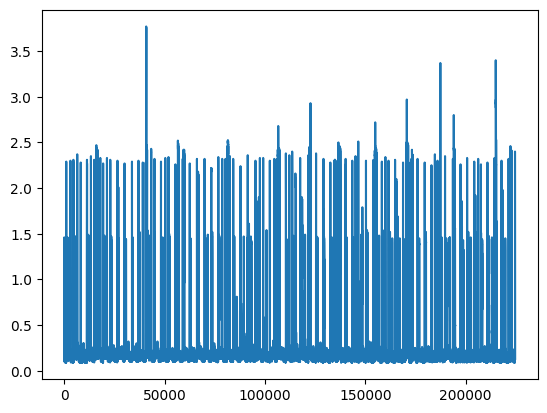

In [168]:
conso_data['kWh'].plot()

In [169]:
l=len(conso_data)-1
l

224636

In [170]:
conso_data['sec']=conso_data['Interval']/1000
conso_data['Wh']=3600000/conso_data['Interval']
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

In [171]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms)
224632,25370,0.14,25.370,141.899882,5373125709
224633,25551,0.14,25.551,140.894681,5373151260
224634,25533,0.14,25.533,140.994008,5373176793
224635,26163,0.14,26.163,137.598899,5373202956
224636,26822,0.13,26.822,134.218179,5373229778


In [172]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)  # convert to microseconds
cumtime

5373229778000

In [173]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début

datetime.datetime(2024, 3, 7, 1, 58, 42, 955467)

In [174]:
conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]
conso_data['days']= [d.strftime('%d/%m/%y') for d in conso_data['dates']]    
#[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,26289,0.14,26.289,136.939404,26289,2024-03-07 01:59:09.244467,07/03/24
1,26243,0.14,26.243,137.179438,52532,2024-03-07 01:59:35.487467,07/03/24
2,25885,0.14,25.885,139.076685,78417,2024-03-07 02:00:01.372467,07/03/24
3,25754,0.14,25.754,139.784111,104171,2024-03-07 02:00:27.126467,07/03/24
4,25774,0.14,25.774,139.675642,129945,2024-03-07 02:00:52.900467,07/03/24
...,...,...,...,...,...,...,...
224632,25370,0.14,25.370,141.899882,5373125709,2024-05-08 06:30:48.664467,08/05/24
224633,25551,0.14,25.551,140.894681,5373151260,2024-05-08 06:31:14.215467,08/05/24
224634,25533,0.14,25.533,140.994008,5373176793,2024-05-08 06:31:39.748467,08/05/24
224635,26163,0.14,26.163,137.598899,5373202956,2024-05-08 06:32:05.911467,08/05/24


In [175]:
# tranche journalière
now = datetime.now()
month = now.month
year = now.year
day = now.strftime('%d/%m/%y')    #str(now.month)+'-'+str(now.day)
day, month, year


('08/05/24', 5, 2024)

In [176]:
here = now.strftime('%H:%M:%S')
here

'06:32:37'

In [177]:
conso_day = conso_data[conso_data['days']==day]
# save to file
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [178]:
conso_day

,Interval,kWh,sec,Wh,cumul(ms),dates,days
223841,28868,0.12,28.868,124.705556,5349692842,2024-05-08 00:00:15.797467,08/05/24
223842,28865,0.12,28.865,124.718517,5349721707,2024-05-08 00:00:44.662467,08/05/24
223843,27247,0.13,27.247,132.124638,5349748954,2024-05-08 00:01:11.909467,08/05/24
223844,27339,0.13,27.339,131.680018,5349776293,2024-05-08 00:01:39.248467,08/05/24
223845,27604,0.13,27.604,130.415882,5349803897,2024-05-08 00:02:06.852467,08/05/24
...,...,...,...,...,...,...,...
224632,25370,0.14,25.370,141.899882,5373125709,2024-05-08 06:30:48.664467,08/05/24
224633,25551,0.14,25.551,140.894681,5373151260,2024-05-08 06:31:14.215467,08/05/24
224634,25533,0.14,25.533,140.994008,5373176793,2024-05-08 06:31:39.748467,08/05/24
224635,26163,0.14,26.163,137.598899,5373202956,2024-05-08 06:32:05.911467,08/05/24


In [179]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
#grouped
# count elements in each group => conso in watts => convert to kW
df_grp = grouped.count()/1000


In [180]:
data = list(df_grp['kWh'])
print(data)


[3.115, 3.751, 3.081, 3.532, 4.539, 3.562, 3.545, 3.647, 3.565, 3.352, 3.356, 4.403, 3.508, 3.441, 3.553, 3.734, 3.535, 3.339, 3.89, 3.418, 3.466, 3.637, 3.765, 3.658, 3.828, 3.835, 3.818, 3.421, 3.474, 4.419, 3.398, 4.078, 3.779, 4.06, 3.431, 3.572, 3.443, 4.127, 3.269, 3.317, 3.706, 3.689, 4.223, 3.279, 3.384, 3.763, 4.081, 3.511, 3.302, 3.287, 3.064, 3.75, 3.816, 3.783, 3.41, 3.449, 3.518, 3.266, 3.604, 3.424, 3.337, 3.534, 0.796]


In [181]:
# save to file
import pickle
path = r'kwh_mean.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

In [182]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
def show(day,pltcolor='moccasin',bgcolor="ivory"):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
    #=[x.hour for x in conso_day['dates']]
    df= conso_day.set_index('heure')
    here = now.strftime('%H:%M:%S')
    conso_jour=len(df['kWh'])
    here, len(df)/1000, conso_jour

    # consommation d'une journée entière à partir de minuit
    # Set background color of the outer 
    # area of the plt
    #plt.figure(facecolor=fgcolor)
    fig, ax = plt.subplots(facecolor=pltcolor)
    
    major_ticks=300;minor_ticks=100
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
    # the size of A4 paper
    fig.set_size_inches(15, 7)
    
    # set bg color
    ax.set_facecolor(bgcolor)
    plt.plot(df['kWh'])
    #plt.plot(conso_day['heure'],conso_day['kWh'])
    plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
    plt.grid()


In [183]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean

kWh    0.324538
dtype: float64

In [184]:
mean=(grouped.count()/1000).mean()
mean

kWh    3.565667
dtype: float64

In [185]:
last=df_grp.iloc[-1]['kWh']

In [186]:
conso_day=conso_data[conso_data['days']==day].copy()  # no more error
conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
df= conso_day.set_index('heure')
#df

In [187]:
here = now.strftime('%H:%M:%S')
conso_jour=len(df['kWh'])
here, len(df)/1000, conso_jour

('06:32:37', 0.796, 796)

In [188]:
df_grp.tail(7)

,kWh
days,
02/05/24,3.518
03/05/24,3.266
04/05/24,3.604
05/05/24,3.424
06/05/24,3.337
07/05/24,3.534
08/05/24,0.796


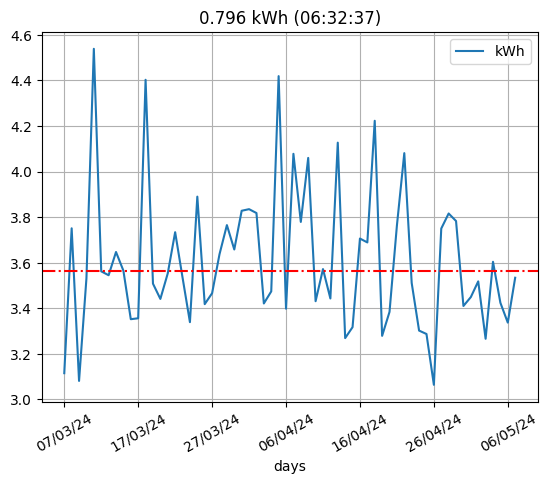

In [189]:
# plot the day consos in the group
df_grp.iloc[:-1].plot(grid=True)
plt.title(str(last)+' kWh ('+str(here)+')')
plt.axhline(y=np.nanmean(df_grp),c='red', ls='-.')
plt.xticks(rotation=30);  # https://ipython.readthedocs.io/en/stable/interactive/tips.html


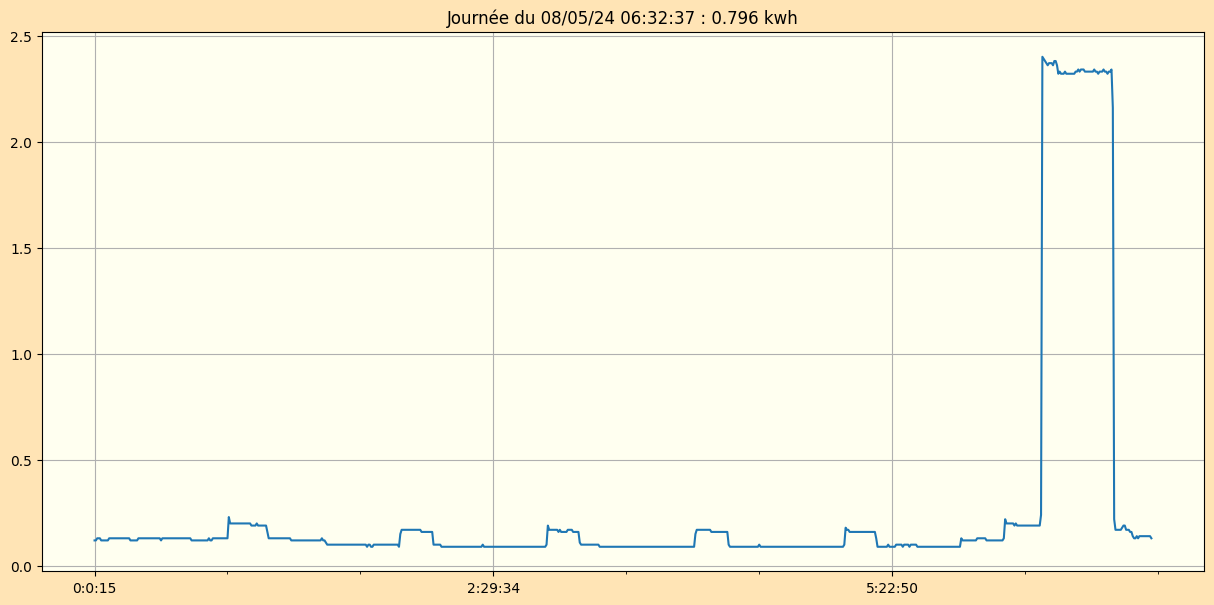

In [190]:
show(day,bgcolor='ivory')

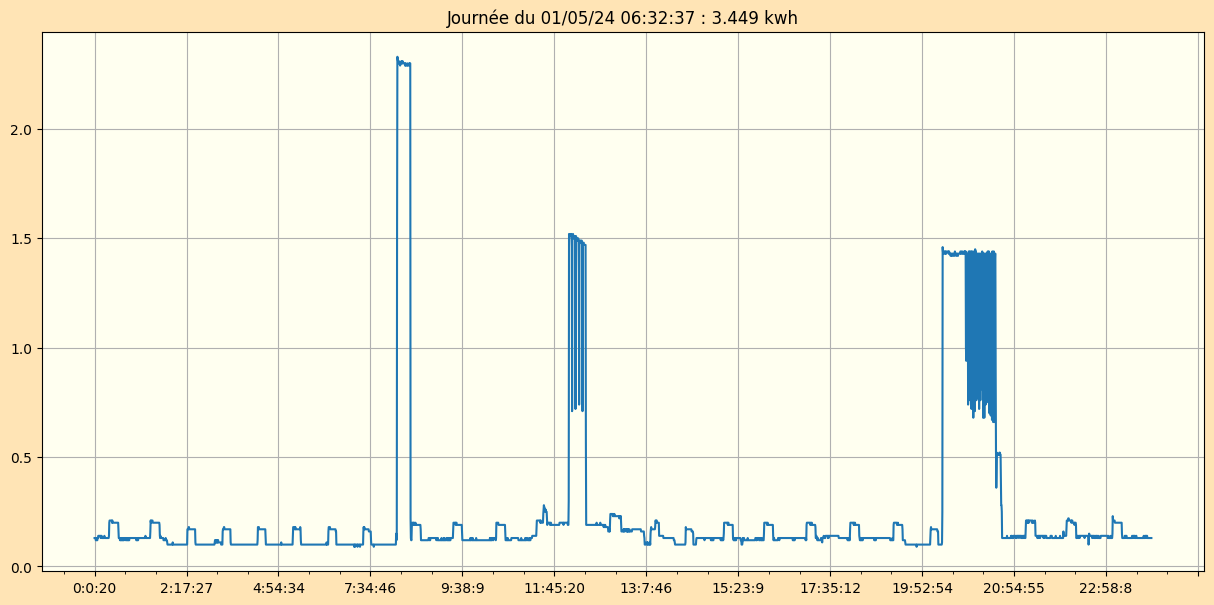

In [191]:
# plot any day
day = '01/05/24'
show(day,pltcolor='moccasin')